# Stock Market Prediction

This notebook is my solution to the market prediction problem from [kaggle](https://www.kaggle.com/mattiuzc/stock-exchange-data). A pdf repport is available in the github repository.

## Data Exploration

The first step is to import the ressources that we will need.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_folder = "data"

indexData = pd.read_csv(os.path.join(data_folder, "indexData.csv"))
indexInfo = pd.read_csv(os.path.join(data_folder, "indexInfo.csv"))
indexProcessed = pd.read_csv(os.path.join(data_folder, "indexProcessed.csv"))

First let's check the shapes of our data sets.

In [3]:
print(indexData.shape)
print(indexInfo.shape)
print(indexProcessed.shape)

(112457, 8)
(14, 4)
(104224, 9)


In [4]:
print(indexData.head())
print(indexInfo.head())
print(indexProcessed.head())

  Index        Date        Open        High         Low       Close  \
0   NYA  1965-12-31  528.690002  528.690002  528.690002  528.690002   
1   NYA  1966-01-03  527.210022  527.210022  527.210022  527.210022   
2   NYA  1966-01-04  527.840027  527.840027  527.840027  527.840027   
3   NYA  1966-01-05  531.119995  531.119995  531.119995  531.119995   
4   NYA  1966-01-06  532.070007  532.070007  532.070007  532.070007   

    Adj Close  Volume  
0  528.690002     0.0  
1  527.210022     0.0  
2  527.840027     0.0  
3  531.119995     0.0  
4  532.070007     0.0  
          Region                  Exchange      Index Currency
0  United States   New York Stock Exchange        NYA      USD
1  United States                    NASDAQ       IXIC      USD
2      Hong Kong  Hong Kong Stock Exchange        HSI      HKD
3          China   Shanghai Stock Exchange  000001.SS      CNY
4          Japan      Tokyo Stock Exchange       N225      JPY
  Index        Date         Open         High      

From the dataset's page, the indexData and indexProcessed files are closely linked. IndexProcessed is indexData but with null values removed and an added column, CloseUSD, which is the close value un US dollars (this column could therefore also be useful if we want to compute the exchange rate at the close time). The indexInfo.csv file is the location, name and currency of the exchange.

In this extract we can notice that the `Open`, `High`, `Low` and `Close` are always equal. We can check if it is the case for all the rows.

In [5]:
print(indexProcessed[indexProcessed["High"]!=indexProcessed["Low"]].shape)
indexProcessed[indexProcessed["High"]!=indexProcessed["Low"]].head()

(83234, 9)


,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD
193,HSI,1987-10-12,3860.600098,3912.199951,3860.600098,3900.199951,3900.199951,0.0,507.025994
194,HSI,1987-10-13,3875.399902,3894.800049,3841.300049,3841.300049,3841.300049,0.0,499.369006
195,HSI,1987-10-14,3855.500000,3858.899902,3844.500000,3844.500000,3844.500000,0.0,499.785000
196,HSI,1987-10-15,3839.800049,3855.399902,3828.600098,3828.600098,3828.600098,0.0,497.718013
197,HSI,1987-10-16,3752.600098,3783.199951,3752.600098,3783.199951,3783.199951,0.0,491.815994


In [6]:
date_range = (indexProcessed["Date"].min(), indexProcessed["Date"].max())
date_range

('1965-01-05', '2021-06-03')

In [7]:
indexProcessed = indexProcessed.set_index("Date")
indexProcessed.head()

,Index,Open,High,Low,Close,Adj Close,Volume,CloseUSD
Date,,,,,,,,
1986-12-31,HSI,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006
1987-01-02,HSI,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013
1987-01-05,HSI,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987
1987-01-06,HSI,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987
1987-01-07,HSI,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013


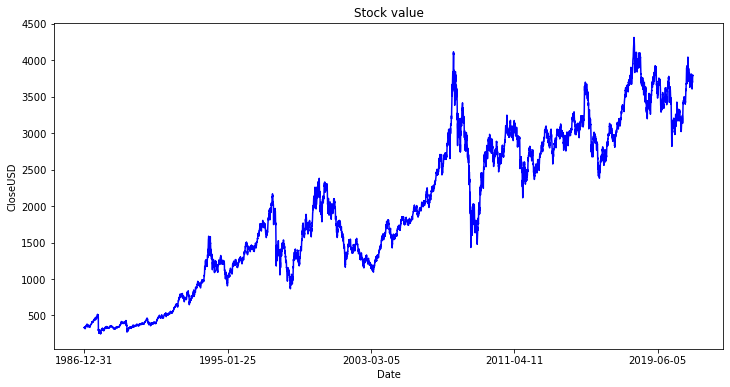

In [8]:
# display the data 
plt.figure(figsize=(12,6))

indexProcessed[indexProcessed["Index"]=="HSI"]["CloseUSD"].plot(title='Stock value', color='blue')
plt.ylabel("CloseUSD")
plt.show()

In [9]:
indexProcessed[indexProcessed["Index"]=="HSI"]["CloseUSD"]["1986-12-31":].index

Index(['1986-12-31', '1987-01-02', '1987-01-05', '1987-01-06', '1987-01-07',
       '1987-01-08', '1987-01-09', '1987-01-12', '1987-01-13', '1987-01-14',
       ...
       '2021-05-17', '2021-05-18', '2021-05-20', '2021-05-21', '2021-05-24',
       '2021-05-25', '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-31'],
      dtype='object', name='Date', length=8492)

In [10]:
indexProcessed['Index'].unique()

array(['HSI', 'NYA', 'IXIC', '000001.SS', 'N225', 'N100', '399001.SZ',
       'GSPTSE', 'NSEI', 'GDAXI', 'SSMI', 'TWII', 'J203.JO'], dtype=object)

In the next cell, I am checking the oldest date for each index.

In [11]:
for index in ['HSI', 'NYA', 'IXIC', '000001.SS', 'N225', 'N100', '399001.SZ', 'GSPTSE', 'NSEI', 'GDAXI', 'SSMI', 'TWII', 'J203.JO']:
    print(index, ":", indexProcessed[indexProcessed["Index"]==index].index.min())

HSI : 1986-12-31
NYA : 1965-12-31
IXIC : 1971-02-05
000001.SS : 1997-07-02
N225 : 1965-01-05
N100 : 1999-12-31
399001.SZ : 1997-08-22
GSPTSE : 1979-06-29
NSEI : 2007-09-17
GDAXI : 1987-12-30
SSMI : 1990-11-09
TWII : 1997-07-02
J203.JO : 2012-02-08


## Data Preparation

We are now going to prepare our data for our model. We will not need to change the frequency of the data, a dayly data is sufficient. However, we will need to choose which metric we want to model, and what we will give our model as inputs.

We will also need to define a  `prediction_length` and a `sample_length`. `prediction_length` will be the duration we want to predict. We will use `sample_length` to create more sample from our data, and not treat each stock as a single training example.

The last think that we will want to think about is wether or not the information from 1986 is still relevant for predicting stock market values today. In order to test this, we will need to train multiple models.

In my first approach, I will treat every index similarily (which is possible because we have access to the `CloseUSD` column). 

For now, I am going to try to predict the `CloseUSD` value, and train my model on the same column. I may try to use `Low` and `High` to train or to predict in the future.

In [12]:
def make_time_series(time_series_df, sample_lenght):
    
    time_series = []
    indexes = time_series_df['Index'].unique()
    for index in indexes:
        end_id = time_series_df[time_series_df['Index']==index].shape[0]

        start_id = end_id-sample_lenght

        while 0<start_id:
            data = time_series_df[time_series_df['Index']==index][start_id:end_id]

            time_series.append(pd.Series(data=data['CloseUSD'], index = data['CloseUSD'].index))

            end_id = start_id
            start_id = end_id - sample_lenght
    return time_series

In [13]:
closed_df = indexProcessed[['Index', 'CloseUSD']].copy()

sample_lenght = 200

time_series = make_time_series(closed_df, sample_lenght)

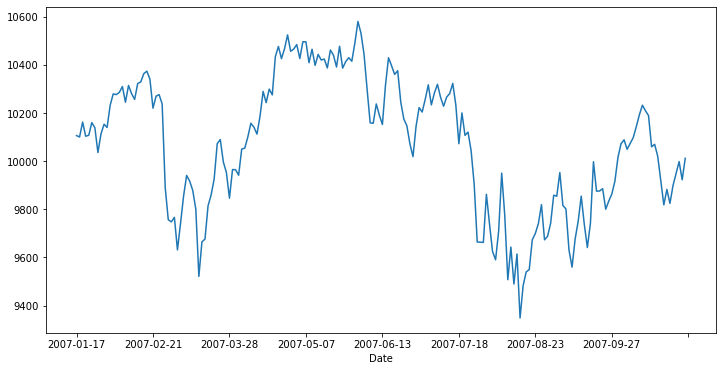

In [14]:
import random as rd

n = len(time_series)
index = rd.randrange(0, n)

plt.figure(figsize=(12,6))
time_series[index].plot()
plt.show()

Now let's prepare the part of the data which we want to predict, by using a `prediction_length`.

In [15]:
def training_series(complete_time_series, prediction_length):
    # get training series
    time_series_training = []
    
    for ts in complete_time_series:
        time_series_training.append(ts[:-prediction_length])
        
    return time_series_training

In [16]:
prediction_length = 30

training_time_series = training_series(time_series, prediction_length)

We will now display the original and training time series on top of one-another.

In [17]:
training_time_series[0]

Date
2020-08-07    3189.110488
2020-08-10    3169.065860
2020-08-11    3235.788360
2020-08-12    3281.722539
2020-08-13    3279.987090
                 ...     
2021-04-12    3698.926309
2021-04-13    3704.642500
2021-04-14    3757.107910
2021-04-15    3743.108282
2021-04-16    3766.062422
Name: CloseUSD, Length: 170, dtype: float64

In [18]:
time_series_index = time_series[index]
training_time_series_index = training_time_series[index]

time_series_index.index = pd.to_datetime(time_series_index.index)
training_time_series_index.index = pd.to_datetime(training_time_series_index.index)

In [19]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

sns.set(font_scale=1.5, style="whitegrid")

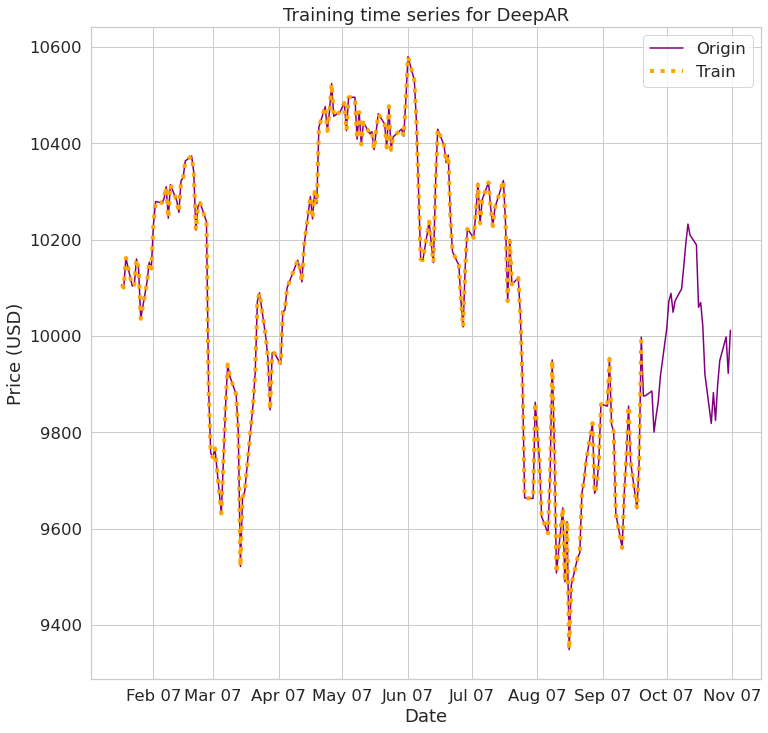

In [20]:
n = len(time_series)
index = rd.randrange(0, n)

fig, ax = plt.subplots(figsize=(12, 12))
ax.plot(time_series_index.index.values,
       time_series_index,
       color='purple',
       label = 'Origin')

ax.set(xlabel="Date",
       ylabel="Price (USD)",
       title="Training time series for DeepAR")

ax.plot(training_time_series_index.index.values,
       training_time_series_index,
       color='orange',
       label = 'Train',
       ls=':',
       lw = 4)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))

ax.xaxis.set_major_locator(mdates.MonthLocator())



plt.legend()
plt.savefig("time_series_train.png")
plt.show()

In [21]:
matplotlib.rc_file_defaults()

## Formatting the data

I am going to continue to follow the Time Series Prediction notebook, and convert the time series to Jsons, so that I can feed these time series to the DeepAR time series forecasting algoritm.

In [22]:
def series_to_json_obj(ts):
    json_obj = {"start": str(ts.index[0]), "target": list(ts)}
    return json_obj

First, we check that the `series_to_json_obj` works correctly.

In [23]:
ts = time_series[rd.randrange(0, n)]

json_obj = series_to_json_obj(ts)

print(json_obj)

{'start': '2012-06-20', 'target': [2537.4504493000004, 2504.4591403, 2469.3670118000005, 2456.6683986, 2467.6391792, 2493.0033986, 2473.2850389000005, 2527.3899222, 2565.618809, 2562.2675, 2575.1870118, 2574.0832819, 2525.6516791999998, 2521.5267194000007, 2524.5829882, 2473.2642194000005, 2482.0420118, 2485.7741792, 2529.1929104, 2501.1845118, 2542.6766014000004, 2553.3041014000005, 2476.951191, 2457.4158986, 2454.0529104, 2456.0625778, 2505.7449222, 2546.1020507, 2573.5853715, 2576.6495118000007, 2559.7258986, 2556.6033597, 2599.8336910000007, 2609.4316014, 2608.5175389, 2635.0311910000005, 2617.6954882, 2610.5767194000005, 2637.9183597, 2606.7975778, 2595.1833986, 2615.0891403, 2613.5550389000005, 2613.011679200001, 2585.411309, 2617.1912299, 2584.403809, 2573.8270896, 2575.5341014, 2572.5062700999997, 2541.8783208, 2532.7341403, 2542.697422200001, 2525.8883208, 2488.8591403, 2497.2091014, 2574.2808208, 2577.5320896000007, 2581.5245118000007, 2609.8007819000004, 2606.1920118000007, 

Here we can see a potential issue with my approach, the fact that we only provide the model with the start date means that it assumes our values are from one day to the next. However, due to the data cleanup, some days are missing. I will start by ignoring this issue and will solve it if our results are not good enough.

## Saving the data

In [24]:
import json

def write_json(time_series, filename): 
    with open(filename, 'wb') as f:
        for ts in time_series:
            json_line = json.dumps(series_to_json_obj(ts)) + '\n'
            json_line = json_line.encode('utf-8')
            f.write(json_line)
    print(filename + ' saved.')

In the next cell, we make sure that the folder where we want to store the data exists.

In [25]:
data_dir = 'json_stock_market_data'

if not os.path.exists(data_dir):
    os.makedirs(data_dir)

In [26]:
train_key = os.path.join(data_dir, 'train.json')
test_key = os.path.join(data_dir, 'test.json')

write_json(training_time_series, train_key)        
write_json(time_series, test_key)

json_stock_market_data/train.json saved.
json_stock_market_data/test.json saved.


## Uploading to S3

In [27]:
import boto3
import sagemaker
from sagemaker import get_execution_role

In [28]:
# session, role, bucket
sagemaker_session = sagemaker.Session()
role = get_execution_role()

bucket = sagemaker_session.default_bucket()

Now lets upload our data to S3.

In [29]:
# general prefix for our project
prefix='capstone-project-stock-market'

train_prefix   = '{}/{}'.format(prefix, 'train')
test_prefix    = '{}/{}'.format(prefix, 'test')

train_path  = sagemaker_session.upload_data(train_key, bucket=bucket, key_prefix=train_prefix)
test_path   = sagemaker_session.upload_data(test_key,  bucket=bucket, key_prefix=test_prefix)

## DeepAR model

We will be using the same deep AR model as in the energy consumption case study.

In [30]:
from sagemaker.amazon.amazon_estimator import get_image_uri

image_name = get_image_uri(boto3.Session().region_name,
                           'forecasting-deepar')

The method get_image_uri has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


In [31]:
from sagemaker.estimator import Estimator

s3_output_path = "s3://{}/{}/output".format(bucket, prefix)

estimator = Estimator(sagemaker_session=sagemaker_session,
                      image_uri=image_name,
                      role=role,
                      train_instance_count=1,
                      train_instance_type='ml.c4.xlarge',
                      output_path=s3_output_path
                      )

train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


Setting the hyperparameters

In [32]:
freq='D'
context_length = prediction_length

hyperparameters = {
    "epochs": "100",
    "time_freq": freq,
    "prediction_length": str(prediction_length),
    "context_length": str(context_length),
    "num_cells": "50",
    "num_layers": "3",
    "mini_batch_size": "128",
    "learning_rate": "0.001",
    "early_stopping_patience": "10"
}

In [33]:
estimator.set_hyperparameters(**hyperparameters)

Finaly, we train our model.

In [34]:
%%time

estimator.fit(inputs={
    "train": train_path,
    "test": test_path
})

2021-08-04 14:21:13 Starting - Starting the training job...
2021-08-04 14:21:37 Starting - Launching requested ML instancesProfilerReport-1628086873: InProgress
...
2021-08-04 14:22:11 Starting - Preparing the instances for training............
2021-08-04 14:24:09 Downloading - Downloading input data...
2021-08-04 14:24:37 Training - Downloading the training image..Arguments: train
[08/04/2021 14:24:52 INFO 140043893224832] Reading default configuration from /opt/amazon/lib/python3.6/site-packages/algorithm/resources/default-input.json: {'_kvstore': 'auto', '_num_gpus': 'auto', '_num_kv_servers': 'auto', '_tuning_objective_metric': '', 'cardinality': 'auto', 'dropout_rate': '0.10', 'early_stopping_patience': '', 'embedding_dimension': '10', 'learning_rate': '0.001', 'likelihood': 'student-t', 'mini_batch_size': '128', 'num_cells': '40', 'num_dynamic_feat': 'auto', 'num_eval_samples': '100', 'num_layers': '2', 'test_quantiles': '[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]'}
[08/04/202

## Deploying the model

In [35]:
%%time

predictor = estimator.deploy(initial_instance_count=1, instance_type='ml.t2.medium')

-----------------------!CPU times: user 394 ms, sys: 12.3 ms, total: 407 ms
Wall time: 11min 33s


## Testing our deployed model

In [36]:
def json_predictor_input(input_ts, num_samples=50, quantiles=['0.1', '0.5', '0.9']):
    
    instances = []
    for k in range(len(input_ts)):
        instances.append(series_to_json_obj(input_ts[k]))

    configuration = {"num_samples": num_samples, 
                     "output_types": ["quantiles"], 
                     "quantiles": quantiles}

    request_data = {"instances": instances, 
                    "configuration": configuration}

    json_request = json.dumps(request_data).encode('utf-8')
    
    return json_request

In [37]:
input_ts = training_time_series
target_ts = time_series

json_input_ts = json_predictor_input(input_ts)

json_prediction = predictor.predict(json_input_ts, initial_args={'ContentType': 'application/json'})

print(json_prediction)

b'{"predictions":[{"quantiles":{"0.1":[3618.7265625,3651.9421386719,3586.5642089844,3634.7282714844,3619.8991699219,3629.6843261719,3681.4301757812,3677.1633300781,3611.9482421875,3674.9404296875,3656.7731933594,3658.3283691406,3671.8432617188,3644.8034667969,3690.9968261719,3696.8828125,3685.0390625,3641.6110839844,3705.48046875,3635.71484375,3662.3107910156,3693.603515625,3689.2705078125,3672.5085449219,3650.208984375,3653.9377441406,3704.0803222656,3713.8974609375,3686.4458007812,3728.8781738281],"0.5":[3737.2497558594,3749.6340332031,3727.140625,3752.802734375,3751.3161621094,3749.1481933594,3779.2990722656,3797.6906738281,3779.3383789062,3791.3283691406,3777.0146484375,3792.07421875,3798.2705078125,3798.7116699219,3822.2749023438,3825.5270996094,3824.4470214844,3798.943359375,3805.3845214844,3816.3515625,3845.1391601562,3843.826171875,3837.0056152344,3819.1208496094,3840.2431640625,3842.9401855469,3823.0822753906,3829.0339355469,3850.2780761719,3862.9448242188],"0.9":[3881.8740234

We then need to decode the predictions.

In [38]:
def decode_prediction(prediction, encoding='utf-8'):
    prediction_data = json.loads(prediction.decode(encoding))
    prediction_list = []
    for k in range(len(prediction_data['predictions'])):
        prediction_list.append(pd.DataFrame(data=prediction_data['predictions'][k]['quantiles']))
    return prediction_list

In [39]:
prediction_list = decode_prediction(json_prediction)

print(prediction_list[0])

            0.1          0.5          0.9
0   3618.726562  3737.249756  3881.874023
1   3651.942139  3749.634033  3847.546387
2   3586.564209  3727.140625  3817.804932
3   3634.728271  3752.802734  3887.906738
4   3619.899170  3751.316162  3874.950439
5   3629.684326  3749.148193  3890.001221
6   3681.430176  3779.299072  3897.773682
7   3677.163330  3797.690674  3908.271973
8   3611.948242  3779.338379  3936.424805
9   3674.940430  3791.328369  3965.181885
10  3656.773193  3777.014648  3912.942139
11  3658.328369  3792.074219  3936.174561
12  3671.843262  3798.270508  3976.183594
13  3644.803467  3798.711670  3959.400879
14  3690.996826  3822.274902  3957.563721
15  3696.882812  3825.527100  3965.359375
16  3685.039062  3824.447021  3985.577393
17  3641.611084  3798.943359  3945.590820
18  3705.480469  3805.384521  3990.037109
19  3635.714844  3816.351562  3931.801514
20  3662.310791  3845.139160  3921.198486
21  3693.603516  3843.826172  3995.873047
22  3689.270508  3837.005615  3999

## Displaying the results

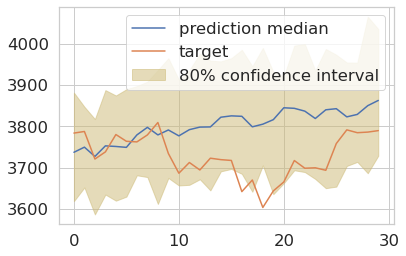

In [40]:
plt.figure()
prediction_list[0]['0.5'].plot(label='prediction median')
target = target_ts[0][-prediction_length:]
plt.plot(range(len(target)), target, label='target')

p10 = prediction_list[0]['0.1']
p90 = prediction_list[0]['0.9']

plt.fill_between(p10.index, p10, p90, color='y', alpha=0.5, label='80% confidence interval')
plt.legend()
plt.savefig('DeepAR_2.png')
plt.show()

## Conclusion

This approach seems to bring very limited results. I do no think that improving the model by tuning the hyperparameters is the solution, I think that I should try to find a model architecture that is better suited for our problem.

I will try an approach more similar to the approach made on kaggle. This approach starts by isolating each of the indexes and works on each index individualy, and will not focus on confidence intervals.

## Deleting the endpoint

In [41]:
predictor.delete_endpoint()

## Second Approach

For this approach I will be doing something that is more similar to the [kaggle](https://www.kaggle.com/adrianmcmahon/multiple-stock-exchange-eda-predictions), and I will use some techniques from this [webpage](https://medium.com/swlh/stock-price-prediction-with-pytorch-37f52ae84632).

I will start by focusing on a single index, `NYA`, the New York Stock Exchange Composite Index.

In [42]:
data_folder = "data"

indexProcessed = pd.read_csv(os.path.join(data_folder, "indexProcessed.csv"))
indexProcessed.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD
0,HSI,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006
1,HSI,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013
2,HSI,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987
3,HSI,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987
4,HSI,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013


I am going to start by running my data through a min/max scaler.

In [43]:
from sklearn.preprocessing import MinMaxScaler

indexProcessed = indexProcessed[indexProcessed["Index"]=='NYA']
indexProcessed = indexProcessed.set_index("Date")
priceClose = indexProcessed[['CloseUSD']]

minMaxScaler = MinMaxScaler(feature_range=(-1, 1))
priceClose['CloseUSD'] = minMaxScaler.fit_transform(priceClose['CloseUSD'].values.reshape(-1,1))

/home/ec2-user/anaconda3/envs/pytorch_latest_p36/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<AxesSubplot:xlabel='Date'>

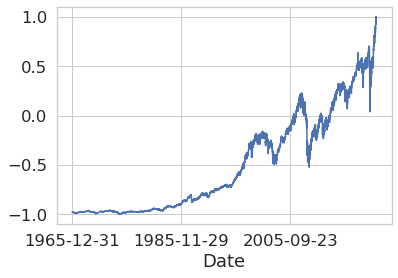

In [44]:
priceClose['CloseUSD'].plot()

## Model structure

This model will be a RNN, with an LTSM layer. It will take as input a sequence of values from a time series and will return a single value, the next predicted next value of the time series. The first step will therefore be to split the data.

## Formatting the data

In [45]:
priceClose.index.to_numpy()

array(['1965-12-31', '1966-01-03', '1966-01-04', ..., '2021-05-26',
       '2021-05-27', '2021-05-28'], dtype=object)

In [46]:
def split_data(stockPrices, lookupWindow):
    data_raw = stockPrices.to_numpy()
    date_raw = stockPrices.index.to_numpy()
    data = []
    date = []
    
    # create all possible sequences of length lookupWindow
    for index in range(len(data_raw) - lookupWindow): 
        data.append(data_raw[index: index + lookupWindow])
        date.append(date_raw[index: index + lookupWindow])
    
    data = np.array(data)
    date = np.array(date)
    test_set_size = int(np.round(0.2*data.shape[0]))
    train_set_size = data.shape[0] - (test_set_size)
    
    x_train = data[:train_set_size,:-1,:]
    x_train_index = date[:train_set_size,:-1]
    y_train = data[:train_set_size,-1,:]
    y_train_index = date[:train_set_size,-1]
    
    x_test = data[train_set_size:,:-1]
    x_test_index = date[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]
    y_test_index = date[train_set_size:,-1]
    
    return [(x_train, x_train_index), (y_train, y_train_index), (x_test, x_test_index), (y_test, y_test_index)]

lookupWindow = 60
(x_train, x_train_index), (y_train, y_train_index), (x_test, x_test_index), (y_test, y_test_index) = split_data(priceClose, lookupWindow)

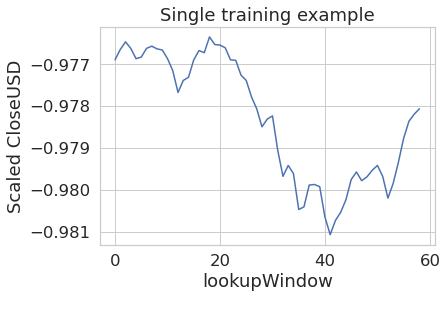

(11110, 59, 1)

In [47]:
index = 10

plt.figure()
plt.plot(x_train[index])
plt.xlabel("lookupWindow\n")
plt.ylabel("Scaled CloseUSD")
plt.title("Single training example")

plt.show()

x_train.shape

## Saving and uploading to S3

In [48]:
def make_csv(x, y, filename, data_dir):
    '''Merges features and labels and converts them into one csv file with labels in the first column.
       :param x: Data features
       :param y: Data labels
       :param file_name: Name of csv file, ex. 'train.csv'
       :param data_dir: The directory where files will be saved
       '''
    # make data dir, if it does not exist
    if not os.path.exists(data_dir):
        os.makedirs(data_dir)
    
    
    # your code here
    pd.concat([pd.DataFrame(y), pd.DataFrame(x)], axis=1).dropna().to_csv(os.path.join(data_dir, filename), header=False, index=False)
    
    # nothing is returned, but a print statement indicates that the function has run
    print('Path created: '+str(data_dir)+'/'+str(filename))

In [49]:
data_dir_pytorch = 'pytorch_data'

make_csv(np.squeeze(x_train),np.squeeze(y_train), filename='train.csv', data_dir=data_dir_pytorch)
make_csv(np.squeeze(x_test), np.squeeze(y_test), filename='test.csv', data_dir=data_dir_pytorch)

Path created: pytorch_data/train.csv
Path created: pytorch_data/test.csv


In [50]:
sagemaker_session = sagemaker.Session()
role = sagemaker.get_execution_role()

bucket = sagemaker_session.default_bucket()

In [51]:
prefix = 'capstone-project-stock-market-pytorch'

pytorch_train_key = os.path.join(data_dir_pytorch, 'train.csv')

pytorch_train_prefix   = '{}/{}'.format(prefix, 'train')

train_path  = sagemaker_session.upload_data(pytorch_train_key, bucket=bucket, key_prefix=pytorch_train_prefix)

## Defining and training the mode

In [52]:
from sagemaker.pytorch import PyTorch

estimator = PyTorch(entry_point="train.py",
                    source_dir="pytorch",
                    output_path='s3://{}/{}/output'.format(sagemaker_session.default_bucket(), prefix),
                    role=role,
                    framework_version='1.0',
                    py_version='py3',
                    train_instance_count=1,
                    train_instance_type='ml.p2.xlarge',
                    sagemaker_session = sagemaker_session,
                    hyperparameters={
                        'epochs': 100,
                        'learning_rate': 0.01,
                        'input_features' : 1,
                        'num_layers' : 2,
                        'hidden_dim': 32,
                        'output_dim' : 1
                    })

train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [53]:
%%time

# Train your estimator on S3 training data

estimator.fit({'train': train_path})

2021-08-04 14:41:21 Starting - Starting the training job...
2021-08-04 14:41:45 Starting - Launching requested ML instancesProfilerReport-1628088081: InProgress
......
2021-08-04 14:42:50 Starting - Preparing the instances for training...............
2021-08-04 14:45:08 Downloading - Downloading input data
2021-08-04 14:45:08 Training - Downloading the training image....bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2021-08-04 14:45:59,517 sagemaker-containers INFO     Imported framework sagemaker_pytorch_container.training
2021-08-04 14:45:59,545 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2021-08-04 14:45:59,547 sagemaker_pytorch_container.training INFO     Invoking user training script.
2021-08-04 14:45:59,892 sagemaker-containers INFO     Module train does not provide a setup.py. 
Generating setup.py
2021-08-04 14:45:59,893 sagemaker-containers INFO     Generating setup.cfg


## Deploying the model and checking the results

In [54]:
%%time

from sagemaker.pytorch import PyTorchModel

pytorch_model = PyTorchModel(model_data=estimator.model_data, role=role, source_dir="pytorch", entry_point='predict.py', framework_version='1.0', py_version='py3')

predictor = pytorch_model.deploy(instance_type='ml.m4.xlarge', initial_instance_count=1)

-----------------!CPU times: user 454 ms, sys: 27.7 ms, total: 481 ms
Wall time: 8min 32s


In [55]:
test_data = pd.read_csv(os.path.join(data_dir_pytorch, "test.csv"), header=None, names=None)

test_y = test_data.iloc[:,0]
test_x = test_data.iloc[:,1:]

In [56]:
predictor.endpoint_name 

'sagemaker-pytorch-2021-08-04-14-47-06-283'

We will now compute the Mean Squared Error.

In [57]:
test_y_preds = predictor.predict(test_x)

test_y_preds = minMaxScaler.inverse_transform(test_y_preds.reshape(test_y_preds.shape[0],1))
test_y = minMaxScaler.inverse_transform(np.array(test_y).reshape(test_y.shape[0],1))

mse = np.sqrt(np.mean(np.square(test_y_preds-test_y)))
mse

1140.4070318007325

The rmse is a bit worse than the one presented in the kaggle notebook, however I have used a longer time frame for my predictions. If we compute the mse for the first 5 years, the mse is equal to 294.305 which is realatively close to 129.75, the mse of the kaggle notebook.

To compute this mse, we first start by indexing the results by date, and we can then select the first 5 years.

In [58]:
test_y_preds_df = pd.DataFrame(test_y_preds)
test_y_preds_df = test_y_preds_df.set_index(y_test_index)
test_y_preds_df.columns = ["Value"]

test_y_df = pd.DataFrame(test_y)
test_y_df = test_y_df.set_index(y_test_index)
test_y_df.columns = ["Value"]

In [59]:
test_y_df.index = pd.to_datetime(test_y_df.index)
test_y_preds_df.index = pd.to_datetime(test_y_preds_df.index)

test_y_df.index

DatetimeIndex(['2010-05-18', '2010-05-19', '2010-05-20', '2010-05-21',
               '2010-05-24', '2010-05-25', '2010-05-26', '2010-05-27',
               '2010-05-28', '2010-06-01',
               ...
               '2021-05-14', '2021-05-17', '2021-05-18', '2021-05-19',
               '2021-05-20', '2021-05-21', '2021-05-24', '2021-05-25',
               '2021-05-26', '2021-05-27'],
              dtype='datetime64[ns]', length=2777, freq=None)

In [60]:
test_y_df

,Value
2010-05-18,6959.209961
2010-05-19,6927.209961
2010-05-20,6653.000000
2010-05-21,6775.450195
2010-05-24,6666.740234
...,...
2021-05-21,16375.000000
2021-05-24,16464.689450
2021-05-25,16390.189450
2021-05-26,16451.960940


In [61]:
mse = np.sqrt(np.mean(np.square(test_y_preds_df["Value"]["2010-05-18":"2015-05-18"].to_numpy()-test_y_df["Value"]["2010-05-18":"2015-05-18"].to_numpy())))
mse

294.30560472583323

Lastly, we can plot our results.

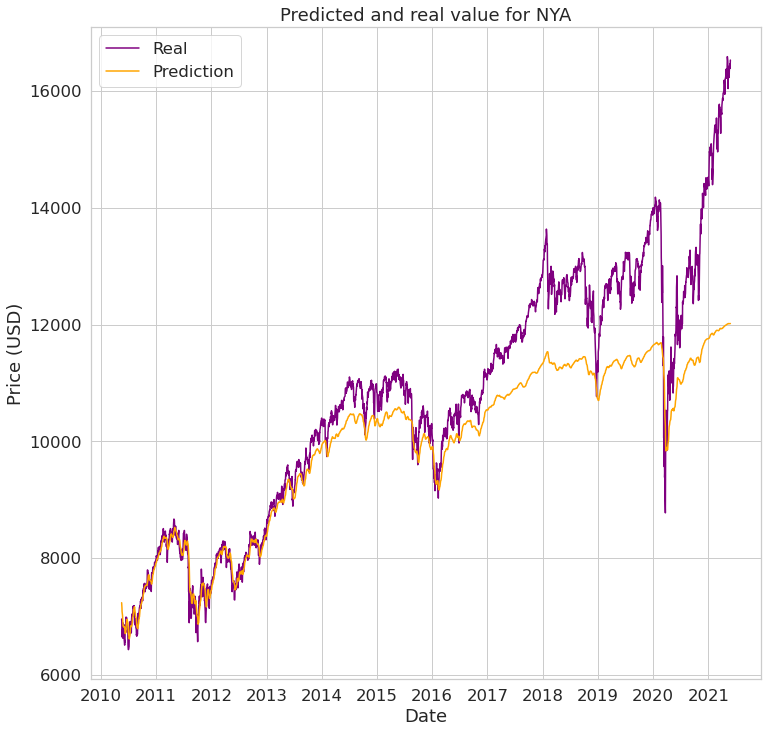

In [62]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.plot(test_y_df.index.values,
       test_y_df["Value"],
       color='purple',
       label = 'Real')

ax.set(xlabel="Date",
       ylabel="Price (USD)",
       title="Predicted and real value for NYA")

ax.plot(test_y_preds_df.index.values,
       test_y_preds_df["Value"],
       color='orange',
       label = 'Prediction')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax.xaxis.set_major_locator(mdates.YearLocator())



plt.legend()
plt.show()

Whith a graphical approach, we can see that the predicted value is very close for the first 7 years, and gets a little inacurate after 2017, while still following the correct rends.

## Predicting multiple values

Now that the model seems to works, we will try to predict multiple values. This would be quite useful in order to predict the long term behaviour of our stock. We will do this by using the model multiple times and inputing our pevious result. First we need some more testing data that is formatted differently.

In [63]:
def prediction_data(stockPrices, lookupWindow, predictWindow):
    data_raw = stockPrices.to_numpy()
    date_raw = stockPrices.index.to_numpy()
    data = []
    date = []
    
    for index in range(len(data_raw) - lookupWindow - predictWindow): 
        data.append(data_raw[index: index + lookupWindow + predictWindow])
        date.append(date_raw[index: index + lookupWindow + predictWindow])
    
    data = np.array(data)
    date = np.array(date)
    test_set_size = int(np.round(0.2*data.shape[0]))
    train_set_size = data.shape[0] - (test_set_size)
    
    x_train = data[:train_set_size,:-predictWindow,:]
    x_train_index = date[:train_set_size,:-predictWindow]
    y_train = data[:train_set_size,-predictWindow:,:]
    y_train_index = date[:train_set_size,-predictWindow:]
    
    x_test = data[train_set_size:,:-predictWindow, :]
    x_test_index = date[train_set_size:,:-predictWindow]
    y_test = data[train_set_size:,-predictWindow:,:]
    y_test_index = date[train_set_size:,-predictWindow:]
    
    return [(x_train, x_train_index), (y_train, y_train_index), (x_test, x_test_index), (y_test, y_test_index)]

predictWindow = 30

_, _, (x_test_prediction, x_test_prediction_index), (y_test_prediction, y_test_prediction_index) = prediction_data(priceClose, lookupWindow, predictWindow)

In [64]:
def predict_window(predictor, sample, predictWindow, display = False):
    res = []
    if display:
        plt.figure()
    for i in range(predictWindow):
        if display:
            plt.plot(sample)
        predicted = predictor.predict(sample.reshape(1, sample.shape[0], 1))
        sample = np.concatenate((sample[1:], predicted))
        res.append(predicted[0])
    if display:
        plt.show()
    return np.array(res)

In [65]:
index = 100
sample = x_test_prediction[index]
expected = y_test_prediction[index]

predicted = predict_window(predictor, sample, predictWindow)


predicted_reverted = minMaxScaler.inverse_transform(np.concatenate((sample, predicted)))
expected_reverted = minMaxScaler.inverse_transform(np.concatenate((sample, expected)))

In [66]:
predicted_df = pd.DataFrame(predicted_reverted)
predicted_df = predicted_df.set_index(np.concatenate((x_test_prediction_index[index], y_test_prediction_index[index])))
predicted_df.columns = ["Value"]

expected_df = pd.DataFrame(expected_reverted)
expected_df = expected_df.set_index(np.concatenate((x_test_prediction_index[index], y_test_prediction_index[index])))
expected_df.columns = ["Value"]

In [67]:
predicted_df.index = pd.to_datetime(predicted_df.index)
expected_df.index = pd.to_datetime(expected_df.index)

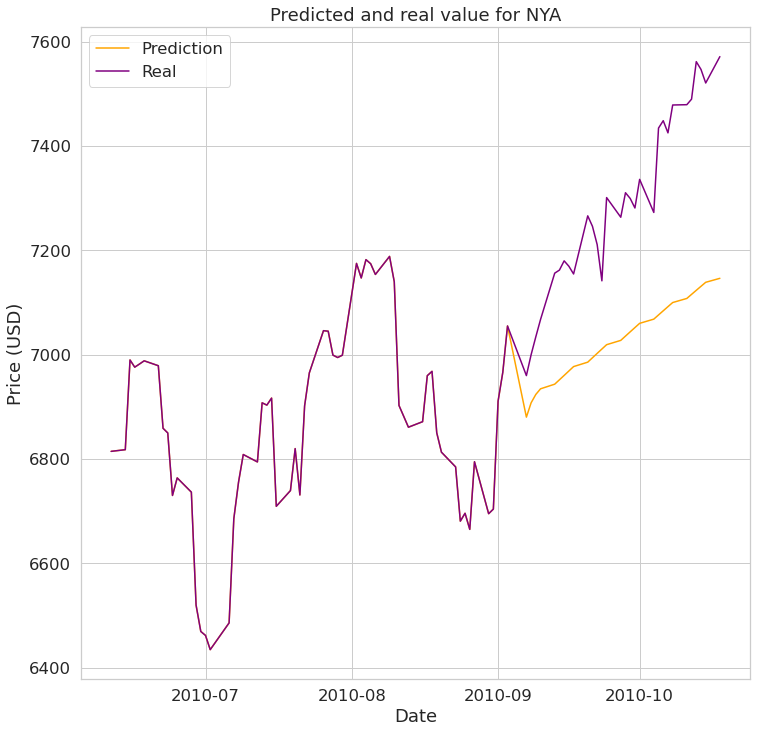

In [68]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.plot(predicted_df.index.values,
       predicted_df["Value"].values,
       color='orange',
       label = 'Prediction')

ax.plot(expected_df.index.values,
       expected_df["Value"].values,
       color='purple',
       label = 'Real')

ax.set(xlabel="Date",
       ylabel="Price (USD)",
       title="Predicted and real value for NYA")

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

ax.xaxis.set_major_locator(mdates.MonthLocator())

plt.legend()
plt.savefig("pytorch_multiple.png")
plt.show()

From the plot, we can see that the predicted values are not close enought to the real values for this method to be conclusive. The correct way would probably be to build a different model that is able to predict multiple steps into the future.

In [69]:
predictor.delete_endpoint()